### Feature Engineering ###

Let's examine which features are available while the Kickstarter campaign is going on:

#Goal amount
#Length of campaign
#Staff Pick
#Category
#Country of campaign
#Description length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
#np.set_printoptions(suppress=True)

In [2]:
kickstarter = pd.read_csv('kickstarter_features_04_25_19_12_59_pm.csv')

In [3]:
kickstarter.describe()

,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged,state_successful
count,207049.000000,2.070490e+05,207049.000000,2.070490e+05,2.070490e+05,2.070490e+05,207049.000000,2.070490e+05,207049.000000
mean,136.686683,1.157873e+04,0.999263,4.414080e+04,1.074044e+09,1.416369e+04,1.016881,1.155609e+04,0.541514
std,890.951528,8.314121e+04,0.182331,1.075333e+06,6.188918e+08,2.322216e+05,0.210705,8.284452e+04,0.498275
min,0.000000,0.000000e+00,0.008779,1.000000e-02,8.624000e+03,0.000000e+00,0.008771,0.000000e+00,0.000000
25%,3.000000,9.100000e+01,1.000000,1.500000e+03,5.371622e+08,9.700000e+01,1.000000,9.100000e+01,0.000000
50%,24.000000,1.367000e+03,1.000000,5.000000e+03,1.075551e+09,1.372000e+03,1.000000,1.367142e+03,1.000000
75%,82.000000,6.000000e+03,1.000000,1.500000e+04,1.608816e+09,6.078000e+03,1.000000,6.000000e+03,1.000000
max,105857.000000,8.596474e+06,1.785406,1.000000e+08,2.147476e+09,8.103074e+07,1.716408,8.596475e+06,1.000000


In [5]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207049 entries, 0 to 207048
Data columns (total 26 columns):
backers_count               207049 non-null int64
blurb                       207046 non-null object
category                    207049 non-null object
converted_pledged_amount    207049 non-null int64
country                     207049 non-null object
created_at                  207049 non-null object
currency                    207049 non-null object
current_currency            207049 non-null object
deadline                    207049 non-null object
fx_rate                     207049 non-null float64
goal                        207049 non-null float64
id                          207049 non-null int64
launched_at                 207049 non-null object
location                    206388 non-null object
name                        207048 non-null object
pledged                     207049 non-null float64
slug                        207049 non-null object
spotlight             

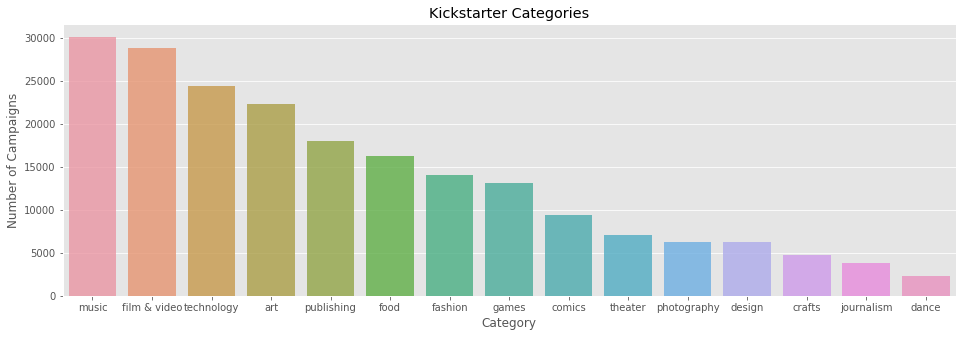

In [35]:
category_list = kickstarter['main_category'].value_counts()
category_list
plt.figure(figsize=(16,5))
sns.barplot(category_list.index, category_list.values, alpha=0.8)
plt.title('Kickstarter Categories')
plt.ylabel('Number of Campaigns', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

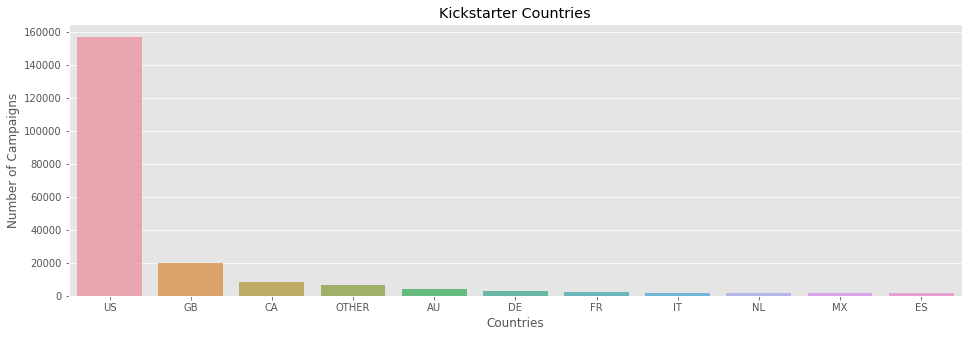

In [36]:
country_list = kickstarter['country'].value_counts()
country_list
plt.figure(figsize=(16,5))
sns.barplot(country_list.index, country_list.values, alpha=0.8)
plt.title('Kickstarter Countries')
plt.ylabel('Number of Campaigns', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.show()

In [37]:
country_list

US       156814
GB        19697
CA         8420
OTHER      6301
AU         4364
DE         2664
FR         2043
IT         1919
NL         1682
MX         1632
ES         1513
Name: country, dtype: int64

main_category  state_successful
art            0                   10898
               1                   11452
comics         0                    2311
               1                    7061
crafts         0                    3290
               1                    1435
dance          0                     626
               1                    1670
design         0                    2234
               1                    4034
fashion        0                    7362
               1                    6689
film & video   0                   11334
               1                   17514
food           0                   10183
               1                    6114
games          0                    4772
               1                    8327
journalism     0                    3273
               1                     504
music          0                   10529
               1                   19618
photography    0                    3345
               1         

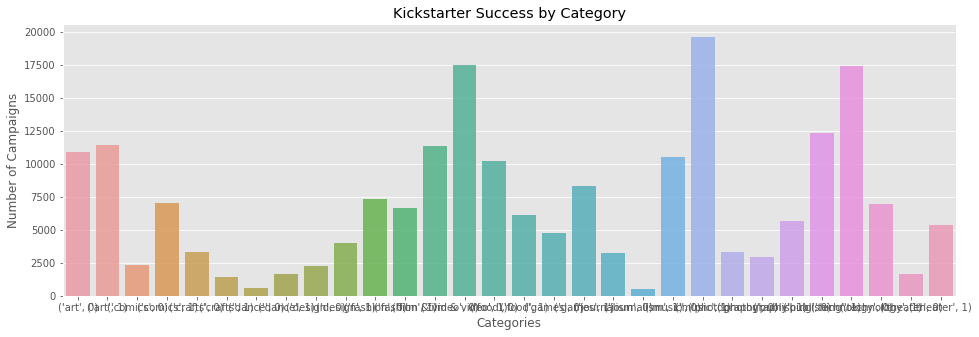

In [62]:
category_success = kickstarter.groupby(['main_category','state_successful']).size()
#category_success = category_success.unstack(level=-1)
#category_success = pd.DataFrame(category_success)
print(category_success)

plt.figure(figsize=(16,5))
sns.barplot(x = category_success.index, y = category_success.values, alpha=0.8)
plt.title('Kickstarter Success by Category')
plt.ylabel('Number of Campaigns', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.show()

In [58]:
category_success.values

array([[10898, 11452],
       [ 2311,  7061],
       [ 3290,  1435],
       [  626,  1670],
       [ 2234,  4034],
       [ 7362,  6689],
       [11334, 17514],
       [10183,  6114],
       [ 4772,  8327],
       [ 3273,   504],
       [10529, 19618],
       [ 3345,  2971],
       [ 5699, 12372],
       [17404,  6978],
       [ 1669,  5381]])

In [64]:
kickstarter[['created_at','launched_at', 'deadline', 'state_changed_at']].head(3)

,created_at,launched_at,deadline,state_changed_at
0,2016-09-11 22:05:51,2016-11-05 18:42:23,2016-12-05 19:42:23,2016-12-05 19:42:23
1,2015-07-10 14:59:32,2015-07-21 12:00:34,2015-08-24 12:00:34,2015-08-24 12:00:34
2,2015-03-24 17:41:14,2015-04-15 16:22:34,2015-05-15 16:22:34,2015-05-15 16:22:34


In [79]:
kickstarter.dtypes

backers_count                        int64
blurb                               object
category                            object
converted_pledged_amount             int64
country                             object
created_at                          object
currency                            object
current_currency                    object
deadline                            object
fx_rate                            float64
goal                               float64
id                                   int64
launched_at                 datetime64[ns]
location                            object
name                                object
pledged                            float64
slug                                object
spotlight                             bool
staff_pick                            bool
state_changed_at            datetime64[ns]
static_usd_rate                    float64
usd_pledged                        float64
usd_type                            object
state_succe

In [78]:
kickstarter['launched_at'] = pd.to_datetime(kickstarter['launched_at'])
kickstarter['state_changed_at'] = pd.to_datetime(kickstarter['state_changed_at'])

In [82]:
from datetime import timedelta, datetime

start_days = kickstarter['launched_at'].values
end_dayes = kickstarter['state_changed_at'].values

In [84]:
length = end_dayes-start_days

In [95]:
length = pd.to_timedelta(length).days

In [96]:
length

Int64Index([30, 34, 30, 45, 30, 60, 30, 30, 30, 60,
            ...
            30, 29, 30, 32, 22, 31, 15, 31, 30, 30],
           dtype='int64', length=207049)

In [97]:
kickstarter['cam_length'] = length

0

In [103]:
kickstarter[['created_at','launched_at', 'deadline', 'state_changed_at', 'cam_length']].head(3)

,created_at,launched_at,deadline,state_changed_at,cam_length
0,2016-09-11 22:05:51,2016-11-05 18:42:23,2016-12-05 19:42:23,2016-12-05 19:42:23,30
1,2015-07-10 14:59:32,2015-07-21 12:00:34,2015-08-24 12:00:34,2015-08-24 12:00:34,34
2,2015-03-24 17:41:14,2015-04-15 16:22:34,2015-05-15 16:22:34,2015-05-15 16:22:34,30


In [104]:
kickstarter.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'current_currency', 'deadline',
       'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name', 'pledged',
       'slug', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'state_successful',
       'main_category', 'child_category', 'cam_length'],
      dtype='object')

In [158]:
blurb = kickstarter['blurb'].astype('str')

In [159]:
blurb

0         An eco-friendly coffee table that is both func...
1         We take digital uploads and make them handpain...
2         We are a team of restaurant pros looking to fu...
3         Loosely-based on a Lakota legend, Grandfather ...
4         We are creating a coffee boutique where you ca...
5         If you want to hear more old school thrash met...
6         A young director tries to show a film about a ...
7         it is a catapult that folds up in to an altoid...
8         SA allows the card giver to send a video, audi...
9         A organic eco-community & farming co-op for ve...
10        I just released my first single, "I'm a Tease"...
11        Distinctive and elegant pet necklaces that are...
12        A poetry chapbook set on the public transit of...
13        Needing help to get this project started and m...
14        A short film about wearing multiple masks and ...
15        X55 is a narrative drama that follows an up an...
16        Let's spend an evening togethe

In [165]:
blurb_length = []

for b in blurb:
    blurb_length_item = len(b.split(' '))
    blurb_length.append(blurb_length_item)

In [167]:
kickstarter['blurb_length'] = blurb_length

In [169]:
kickstarter.dtypes

backers_count                        int64
blurb                               object
category                            object
converted_pledged_amount             int64
country                             object
created_at                          object
currency                            object
current_currency                    object
deadline                            object
fx_rate                            float64
goal                               float64
id                                   int64
launched_at                 datetime64[ns]
location                            object
name                                object
pledged                            float64
slug                                object
spotlight                             bool
staff_pick                            bool
state_changed_at            datetime64[ns]
static_usd_rate                    float64
usd_pledged                        float64
usd_type                            object
state_succe

In [170]:
kickstarter['category'].value_counts()

{"id":332,"name":"Apps","slug":"technology/apps","position":2,"parent_id":16,"color":6526716,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/technology/apps"}}}                                             4934
{"id":262,"name":"Accessories","slug":"fashion/accessories","position":1,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/accessories"}}}                              4075
{"id":30,"name":"Documentary","slug":"film & video/documentary","position":4,"parent_id":11,"color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/documentary"}}}                3971
{"id":263,"name":"Apparel","slug":"fashion/apparel","position":2,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/apparel"}}}                                          3870
{"id":32,"name":"Shorts","slug":"film & video/shorts","p

In [171]:
g = kickstarter['category']
from ast import literal_eval
g = g.apply(literal_eval)

In [175]:
g[0]['slug'].split('/')[0]

'crafts'

In [173]:
child_category = []
for i, name in enumerate(d['name'] for d in g): 
    child_category.append(name)

In [174]:
kickstarter['child_category'] = child_category

In [176]:
main_category = []
for i, name in enumerate(d['slug'].split('/')[0] for d in g): 
    main_category.append(name)

In [178]:
kickstarter['main_category'] = main_category

In [181]:
#kickstarter.to_csv('kickstarter_make_EDA_graphs.csv', index = False)

In [182]:
kickstarter = pd.get_dummies(columns = ['main_category'], drop_first = True, data = kickstarter)

In [183]:
kickstarter.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'current_currency', 'deadline',
       'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name', 'pledged',
       'slug', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'state_successful',
       'child_category', 'cam_length', 'blurb_length', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater'],
      dtype='object')